# Webスクレイピングを利用した形態素分析による可視化

Webスクレイピング を行うために必要なライブラリは「requests」と「BeautifulSoup」です。

「requests」はwebサイトにアクセスして情報を取得できるライブラリ、「BeautifulSoup」はHTMLの各要素の情報を取得できるライブラリです。

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

```
今回のPythonのコード構成は以下のようになっています。

ライブラリのインポート
スクレイピングしたいサイトにアクセス
WEBサイトから情報取得
取得情報の整理、加工
サーバーへの負担を減らすための待機
CSVファイルに出力
```

```
この部分でWebサイトにアクセスを行なっています。
今回はurlにあいみょんの歌詞ページのトップページを指定しています。
そして、そのurlのあるwebサイトの情報をresponseに代入し、さらに、HTMLの情報のみをsoupに代入して、<td class=’side td1′>の情報全てをlinksに代入しています。　

このようにどんどん必要な情報に近づいていきます。
```

In [27]:
#スクレイピングしたデータを入れるフォーマットを作成
list_df = pd.DataFrame(columns=['曲名','歌詞'])

 次にfor文使ってlinksに代入している全ての曲名のリンクをlinkに１つずつ代入して、

曲名をsong_name、歌詞の情報をsong_kashiに代入しています。

In [28]:
#歌詞ページはページ数に合わせて、範囲を変更してください。
#歌詞ページのページ数（xページ）に合わせて、　xに＋１して（０,x+1）活用してください。
for page in range(0,1): 
    base_url = 'https://www.uta-net.com'

    #歌詞一覧ページを取得
    #ページが複数ページであった場合は下記を活用してください。
    #url = 'https://www.uta-net.com/artist/******/0/' + str(page) + '/'
    #ページが複数ページの場合は下記の一文を[#]でコメントアウトしてください。
    url = 'https://www.uta-net.com/artist/17598/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    links = soup.find_all('td', class_='side td1')
    
    #歌詞情報を取得
    for link in links:
        a = base_url + (link.a.get('href'))
        response = requests.get(a)
        soup = BeautifulSoup(response.text, 'lxml')
        song_name = soup.find('h2').text
        detail = soup.find('p', class_="detail").text
        
        song_kashi = soup.find('div', id="kashi_area")
        song_kashi = song_kashi.text
        song_kashi = song_kashi.replace('\n','')
        song_kashi = song_kashi.replace('この歌詞をマイ歌ネットに登録 >このアーティストをマイ歌ネットに登録 >','　')
        #サーバーに負荷を与えないため1秒待機
        time.sleep(1)
        #取得した歌詞を表に追加
        tmp_se = pd.DataFrame([[song_name], [song_kashi]], index=list_df.columns).T
        list_df = list_df.append(tmp_se)

#csv保存
list_df.to_csv('aimyon_list.csv', mode = 'w', encoding='utf-8')

## janomeという形態素分析のライブラリを使って、あいみょんの歌詞を分析してみたいと思います。

あいみょんの歌詞を単語に分けて、さらにwordcloudで頻出語句ほど多く表示させることで、歌詞を分析していきます！　どんな単語が多いんでしょうか！？

```
今回のPythonのコード構成は以下のようになっています。

ライブラリのインポート
歌詞データ（日本語の文章）の抽出
歌詞データ（日本語の文章）を形態素分析
描画の設定
描画の実行
```

歌詞（日本語の文字列）を分析するために必要なライブラリは「Janome」と「WodCloud」です。「Janome」は日本を形態素分析できるライブラリ、「WodCloud」は頻出単語の頻度に応じて大きさを調整できるライブラリです。

In [29]:
# ライブラリのインストール
from janome.tokenizer import Tokenizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib.font_manager import FontProperties

この部分ではCSVのデータを読み込み、dfに代入します。
歌詞や文章のCSVデータは分析で使うpythonファイルと同じディレクトリに保存して置いてください。
WEBサイトの更新などで、歌詞のindex番号が変わっている場合があるので念のため確認してください！

In [30]:
df = pd.read_csv('aimyon_list.csv')
marigold =df.loc[55,'歌詞']

In [31]:
df.info

<bound method DataFrame.info of     Unnamed: 0           曲名                                                 歌詞
0            0      愛を知るまでは  いざ、手のなる方へと導いたのは　誰でもない自分自身なのに自信がないよ　笑っちゃうなもたついて...
1            0    愛を伝えたいだとか  健康的な朝だなこんな時に君の“愛してる”が聞きたいや揺れるカーテン少し浮いた前髪もすべて心地...
2            0            葵  きっと僕たちが想像した未来は幼い頃見つけた石ころみたいに丸っこくて変な傷跡なんかもなくてさ平...
3            0      憧れてきたんだ  私が知ってるロックスターなら数年前に墓の中掘り起こせ掘り起こそうギターをまた握らせてやろう私...
4            0           朝陽  「今日はちょっと早いかもゴメン」なんて言われましても私遅かれ早かれ後悔するから何でもいいよ　...
..         ...          ...                                                ...
64           0       ら、のはなし  君のいない世界で僕が生きるとすればそれはそれはとても居心地が悪いことだろう愛しい人のためなら...
65           0    RING DING  ため息は酸素の無駄使いさどうせなら楽しい話をしよういい加減その態度やめてよね可愛い顔が台無し...
66           0      分かってくれよ  君はケンカした夜に公園で泣いてるんだってね風の噂で聞いたよ　僕にどうしろって言うの？何も一人...
67           0       わかってない  あなたが知ってる私はどんな子？可愛くて優しい気の利いた良い子？私が思ってる2人の理想追い続け...
68           0  私に彼氏ができない理由  もうクリスマス　そんなの困ります私だって今年は愛する人とあの光をあの場所で見たいわ街に出れば...

[69 rows x 3 column

今回は「マリーゴールド」の歌詞を分析するので、マリーゴールドの歌詞のみをmarigoldに代入します。

In [32]:
t = Tokenizer()
tokens = t.tokenize(marigold)
 
 
word_list=[]
for token in tokens:
    word = token.surface
    partOfSpeech = token.part_of_speech.split(',')[0]
    partOfSpeech2 = token.part_of_speech.split(',')[1]
     
    if partOfSpeech in['名詞', '動詞', '形容詞', '形容動詞']:
        if (partOfSpeech != "記号"):
            if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
                word_list.append(word)
 
words=" ".join(word_list)
print(words)  

風 強 さ 心 揺さぶり 真面目 見つめ 恋しい でんぐり返し 日々 可哀想 し だらけ 希望 光 目 前 輝い 幸せ 麦わら 帽子 揺れ マリー ゴールド 似 空 青い 夏 懐かしい 笑え 恋 離れ 泣き そう 目 見つめる 雲 優し さ 抱きしめ 抱きしめ 離さ 本当 気持ち 全部 吐き出せる 強く ない 不思議 絶望 見え 目 奥 写る シルエット 大好き さ 柔らか 肌 寄せ 冷たい 空気 人 かみしめ 歩く 今日 名前 つけよ 話し アイラブユー 言葉 足り キス し 雲 人 影 残す 遥か 遠い 場所 い 繋がっ 人 想い 麦わら 帽子 揺れ マリー ゴールド 似 空 青い 夏 懐かしい 笑え 恋 離れ 泣き そう 目 見つめる 雲 優し さ 抱きしめ 離さ アイラブユー 言葉 足り キス し 雲 人 影 残す 離さ 離さ


この部分で歌詞の形態素分析をしています。
歌詞を単語に分けた後に、word_listという空のリストに’名詞’、’動詞’、’形容詞’、’形容動詞’のみ追加していきます。

In [33]:
font_path = './TakaoPGothic.ttf'  #DLしたパスを指定. /font以下でなくても良い
font_prop = FontProperties(fname=font_path)

In [34]:
stop_words = ['し','さ','れ','ない']  # 表示させない単語の設定
fpath = 'TakaoPGothic.ttf'  # 日本語フォント指定

https://github.com/byrongibson/fonts/tree/master/backup/truetype.original/takao-gothic

この部分で描画の設定を行います。

stop_wordsでは描画させてない単語を選定します。あまり意味を持たない単語かつ、頻出し過ぎて他の単語があまりよくわからない時などに設定します。

描画後にこの言葉はいらないなーと思った際に適宜追加していくと良いです。

他には図の大きさ、背景の色の設定などを行なっています。



In [35]:
wordcloud = WordCloud(
    font_path=fpath,
    width=900, height=600,   # default width=400, height=200
    background_color="white",   # default=”black”
    stopwords=set(stop_words),
    max_words=500,   # default=200
    min_font_size=4,   #default=4
    collocations = False   #default = True
    ).generate(words)

この部分で描画、出力した内容を画像保存しています。

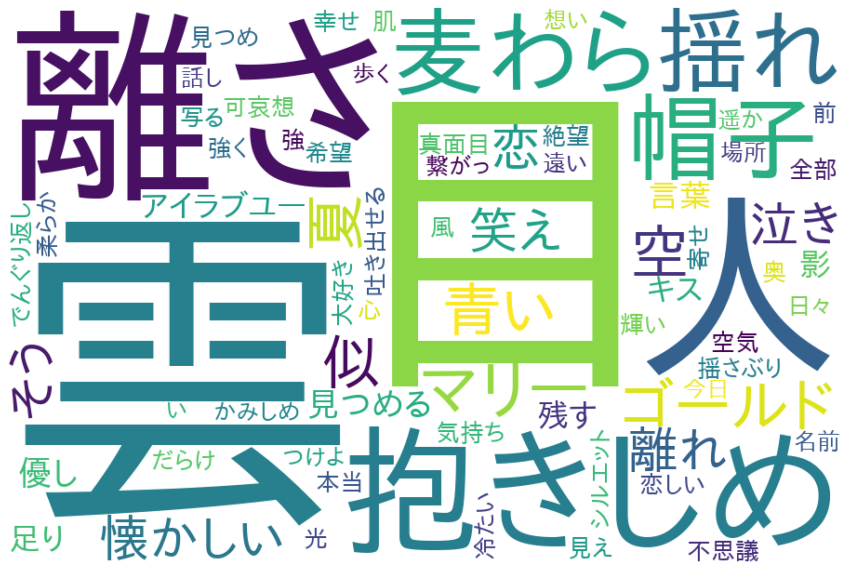

In [36]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.savefig("marigold.png")
plt.show()

# マスク画像を使って表現のバリエーションを広げる

ImageColorGeneratorとImageを追加でインポートします

In [39]:
# ライブラリのインポート　
# ImageColorGeneratorとImageを追加でインポート

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np

使用する画像はpythonのファイルと同じディレクトリに保存して下さい。

また、画像は背景が白でないとうまくいきませんので、ご注意ください。

In [40]:
img_color = np.array(Image.open('aim2.png'))

この部分で画像の色を分析して、抽出します。

In [41]:
wordcloud = WordCloud(
    font_path=fpath,
    width=900, height=600,   # default width=400, height=200
    background_color="white",   # default=”black”
    stopwords=set(stop_words),
    max_words=500,   # default=200
    min_font_size=4,   #default=4
    # mask=img_color　抽出した画像の色を描画の際に活用する設定です。
    mask=img_color,
    collocations = False   #default = True
    ).generate(words)

image_colors = ImageColorGenerator(img_color)

mask=img_colorで抽出した画像の形を描画の際に活用する設定を行います。

image_colors = ImageColorGenerator(img_color)で抽出した画像の色を描画の際に活用するために色の情報をimage_colorsに代入します。
wordcloud.recolor(color_func=image_colors)で描画の色に画像の色を使う設定を行います。

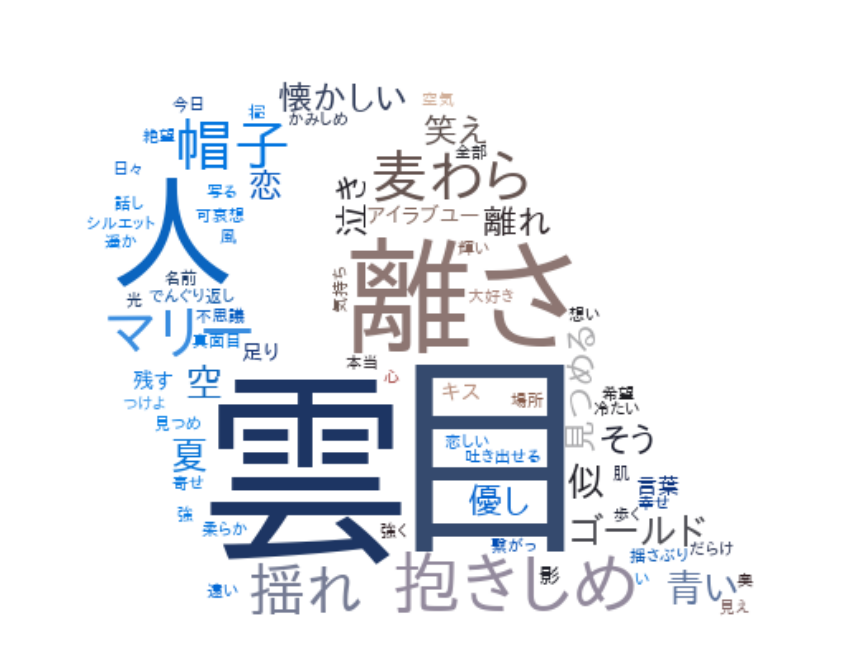

In [42]:
plt.figure(figsize=(15,12))
#
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
plt.savefig("marigold_mask.png")
plt.show()